In [1]:
%matplotlib inline
import networkx as nx
import tweepy

# Authentication

c.f. http://docs.tweepy.org/en/v3.5.0/auth_tutorial.html

In [2]:
consumer_token = 'PmQIZekz3krr472GPX7g8Dwv9'
consumer_secret = 'jX8DnGExxJNoyFL3x9Znw5bgmy9XO5gv5UO1E1qfGQYqIcAX0A'
access_token = '1691838529-hTnm5fuIHYRaCkKN6rG7HaVqFDtoczetNjazM8Z'
access_secret = 'WJ1NBoc9lqPqfcVjZANOsluoETdRD55M8e2Zi703zfB1z'
auth = tweepy.OAuthHandler(consumer_token, consumer_secret)
auth.set_access_token(access_token, access_secret)
api = tweepy.API(auth)
public_tweets = api.user_timeline();

In [3]:
api.verify_credentials()._json

{'contributors_enabled': False,
 'created_at': 'Thu Aug 22 18:43:25 +0000 2013',
 'default_profile': True,
 'default_profile_image': False,
 'description': '',
 'entities': {'description': {'urls': []}},
 'favourites_count': 0,
 'follow_request_sent': False,
 'followers_count': 0,
 'following': False,
 'friends_count': 2,
 'geo_enabled': False,
 'has_extended_profile': False,
 'id': 1691838529,
 'id_str': '1691838529',
 'is_translation_enabled': False,
 'is_translator': False,
 'lang': 'zh-cn',
 'listed_count': 0,
 'location': '',
 'name': '朱智成',
 'notifications': False,
 'profile_background_color': 'C0DEED',
 'profile_background_image_url': 'http://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_image_url_https': 'https://abs.twimg.com/images/themes/theme1/bg.png',
 'profile_background_tile': False,
 'profile_image_url': 'http://pbs.twimg.com/profile_images/378800000377475863/60fda86b036c65d023b773dd90ffb418_normal.jpeg',
 'profile_image_url_https': 'https://pbs.twimg

# User objects

In [4]:
ego_profile = api.get_user(screen_name='clayadavis')

In [5]:
me._json

NameError: name 'me' is not defined

In [6]:
ego_profile.followers_count

215

In [7]:
ego_profile.id


1548959833

In [8]:
ego_profile.screen_name

'clayadavis'

In [9]:
D = nx.DiGraph()

In [10]:
D.add_node(ego_profile.id)

In [11]:
D.node[ego_profile.id].update(ego_profile._json)

In [12]:
D.node[ego_profile.id]['screen_name']

'clayadavis'

In [13]:
followers_ids = api.followers_ids(user_id=ego_profile.id, count=5000)

In [14]:
followers_ids

[850428146033860609,
 1691838529,
 928963718540652544,
 12408202,
 48966808,
 932447149568266240,
 302197946,
 928705408864260096,
 15911790,
 3229289016,
 572282251,
 369226017,
 3003751864,
 17015363,
 36957702,
 912687795214471169,
 562649685,
 43433353,
 592798129,
 2930738596,
 749242830728601600,
 21778539,
 18518136,
 2393163374,
 920032212053053446,
 2980782490,
 121309437,
 789296,
 4291710793,
 39887629,
 729482190078251009,
 808915842146693120,
 2911354396,
 2952093007,
 897866837333037058,
 1427,
 898380666232078336,
 885643395183525892,
 2332066656,
 16246810,
 89478386,
 712113147193245697,
 140407690,
 742562983071653890,
 551230758,
 924411704,
 758730435421536257,
 3736320560,
 2788179325,
 552453033,
 851843645733036033,
 16614424,
 4642736548,
 123834795,
 845966495872155648,
 845792318603055105,
 818182652725444608,
 16901573,
 777265067314282498,
 798266006032576512,
 574880510,
 144972081,
 292490236,
 805157760417599489,
 979669927,
 77200220,
 816366211755900929

In [15]:
for follower_id in followers_ids:
    D.add_edge(ego_profile.id, follower_id)

In [16]:
len(D)

216

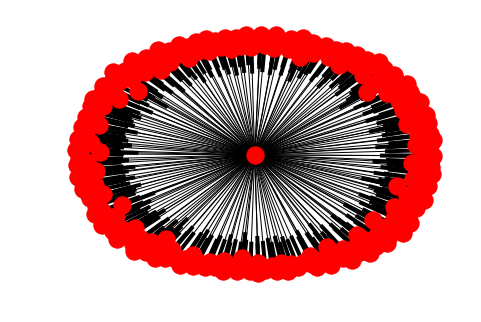

In [17]:
nx.draw(D)

In [18]:
print(nx.info(D))

Name: 
Type: DiGraph
Number of nodes: 216
Number of edges: 215
Average in degree:   0.9954
Average out degree:   0.9954


In [19]:
focus_node_id=followers_ids[0]

In [20]:
def update_profile(D, node_id):
    focus_profile=api.get_user(user_id=node_id)
    D.node[node_id].update(focus_profile._json)
    return node_id

In [21]:
update_profile(D, focus_node_id)

850428146033860609

In [22]:
D.node[focus_node_id]['screen_name']

'fscomedyhour'

In [23]:
D.node[focus_node_id]['followers_count']

435

In [24]:
def update_followers(D, node_id):
    followers_ids = api.followers_ids(user_id=node_id, count=5000)
    for follower_id in followers_ids:
        D.add_edge(node_id,follower_id)

In [25]:
update_followers(D, focus_node_id)

In [26]:
print(nx.info(D))

Name: 
Type: DiGraph
Number of nodes: 651
Number of edges: 650
Average in degree:   0.9985
Average out degree:   0.9985


In [27]:
count = 0
for follower_id in followers_ids:
    update_profile(D, follower_id)
        # Do stuff with `user`
    if count<10:
        if D.node[follower_id]['followers_count']>100:
            update_followers(D, follower_id)
            count+=1
    else:
        pass

In [28]:
print(nx.info(D))
for node in D.nodes:
    if D.out_degree(node)>0:
        print(node)

Name: 
Type: DiGraph
Number of nodes: 23240
Number of edges: 23872
Average in degree:   1.0272
Average out degree:   1.0272
1548959833
850428146033860609
12408202
48966808
302197946
15911790
3229289016
572282251
369226017
17015363
43433353


In [47]:
node_deg_greater_one=[]
for node in D.node:
    
    if D.degree(node) >1:
        node_deg_greater_one.append(int(node))
        print(str(node)+' has more then 1 follower')

1548959833 has more then 1 follower
850428146033860609 has more then 1 follower
12408202 has more then 1 follower
48966808 has more then 1 follower
932447149568266240 has more then 1 follower
302197946 has more then 1 follower
928705408864260096 has more then 1 follower
15911790 has more then 1 follower
3229289016 has more then 1 follower
572282251 has more then 1 follower
369226017 has more then 1 follower
17015363 has more then 1 follower
43433353 has more then 1 follower
4291710793 has more then 1 follower
2911354396 has more then 1 follower
897866837333037058 has more then 1 follower
1427 has more then 1 follower
898380666232078336 has more then 1 follower
758730435421536257 has more then 1 follower
818182652725444608 has more then 1 follower
798266006032576512 has more then 1 follower
574880510 has more then 1 follower
292490236 has more then 1 follower
816366211755900929 has more then 1 follower
700746896680161280 has more then 1 follower
3061580480 has more then 1 follower
41826

In [48]:
for node in node_deg_greater_one:
    focus_node_id=node
    update_profile(D, focus_node_id)
    update_followers(D, focus_node_id)
        

RateLimitError: [{'message': 'Rate limit exceeded', 'code': 88}]

{1548959833: 'clayadavis', 850428146033860609: 'fscomedyhour', 12408202: 'abarrera', 48966808: 'BradaighOCnoic', 932447149568266240: 'rollertrollster', 302197946: '__Ghumaan', 928705408864260096: 'tuna_lad', 15911790: 'bobinorlando', 3229289016: 'NOMOREAFTER44', 572282251: 'KottiPillar', 369226017: 'DittmerSmash', 17015363: 'abjectworld', 43433353: 'JoanieGentian', 4291710793: 'R_AI_TF', 2911354396: 'polbots', 897866837333037058: 'CNS_NRT', 1427: 'tchambers', 898380666232078336: 'onurvarolbot', 758730435421536257: 'tockards', 818182652725444608: 'smartbike24', 798266006032576512: 'OSoMe_Bot', 574880510: 'aCandidMind', 292490236: 'zamandigital', 816366211755900929: 'AssayCell', 700746896680161280: 'netsci2017', 3061580480: 'GuillaumeSalha', 41826526: 'pshiralk', 762668739548643328: 'propstopforscht', 21423768: 'mmdelc', 11156392: 'brendam', 1599902202: 'MarlonMasine', 408429112: 'ChASM_ws', 2695374271: 'simply_jaehyuk', 390917352: 'SidharthSaxena', 272065025: 'lajello', 110420616: 'Marc

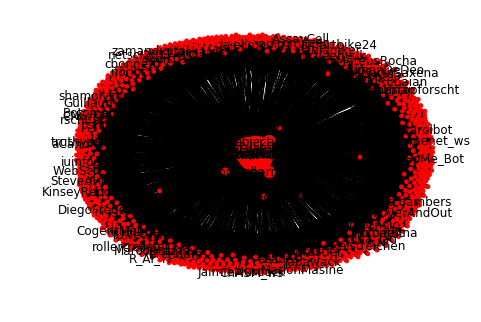

In [49]:
great_one_nodes = []
min_size = 10
node_scale = 1




for nd in D.nodes:
    if int(nd) in node_deg_greater_one:
        
        great_one_nodes.append(nd)
S = D.subgraph(great_one_nodes)
labels = nx.get_node_attributes(S, 'screen_name')
print(labels)
print(len(S))
node_sizes = [min_size + node_scale * S.degree(n) * 2 for n in S]
node_sizes
nx.draw(S, labels=labels,node_size=node_sizes)